In [1]:
import os
import pandas as pd
import numpy as np

os.getcwd()

pd.pandas.set_option('display.max_columns',None)

In [2]:
train_df=pd.read_csv('train_v9rqX0R.csv')
test_df=pd.read_csv('test_AbJTz2l.csv')
all_df=pd.concat([train_df,test_df], axis=0, ignore_index=True).reset_index(drop=True)
train_df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 1). Data Analysis:

### 1.1). Brief Information:

In [3]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
categorical_columns=[each for each in train_df.columns if train_df[each].dtypes=='O']
numerical_columns=[each for each in train_df.columns if train_df[each].dtypes!='O']

In [5]:
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [6]:
numerical_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [7]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# Items that aren't visible, how are they sold in the outlet. Seems Suspicious.

### 1.2). Missing Data:

In [9]:
# Outlet_Establishment_Year is ordinal feature:

for each in train_df.columns:
    print("Percentage of missing values in {0} is ".format(each)+str(train_df[each].isna().mean()))

Percentage of missing values in Item_Identifier is 0.0
Percentage of missing values in Item_Weight is 0.1716531737651062
Percentage of missing values in Item_Fat_Content is 0.0
Percentage of missing values in Item_Visibility is 0.0
Percentage of missing values in Item_Type is 0.0
Percentage of missing values in Item_MRP is 0.0
Percentage of missing values in Outlet_Identifier is 0.0
Percentage of missing values in Outlet_Establishment_Year is 0.0
Percentage of missing values in Outlet_Size is 0.2827642848762173
Percentage of missing values in Outlet_Location_Type is 0.0
Percentage of missing values in Outlet_Type is 0.0
Percentage of missing values in Item_Outlet_Sales is 0.0


In [10]:
for each in test_df.columns:
    print("Percentage of missing values in {0} is ".format(each)+str(train_df[each].isna().mean()))

Percentage of missing values in Item_Identifier is 0.0
Percentage of missing values in Item_Weight is 0.1716531737651062
Percentage of missing values in Item_Fat_Content is 0.0
Percentage of missing values in Item_Visibility is 0.0
Percentage of missing values in Item_Type is 0.0
Percentage of missing values in Item_MRP is 0.0
Percentage of missing values in Outlet_Identifier is 0.0
Percentage of missing values in Outlet_Establishment_Year is 0.0
Percentage of missing values in Outlet_Size is 0.2827642848762173
Percentage of missing values in Outlet_Location_Type is 0.0
Percentage of missing values in Outlet_Type is 0.0


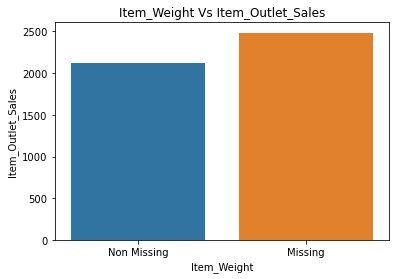

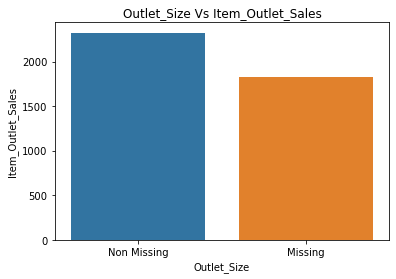

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

for each in ['Item_Weight','Outlet_Size']:
    x=['Non Missing','Missing']
    y1=np.mean(train_df[~train_df[each].isna()]['Item_Outlet_Sales'])
    y2=np.mean(train_df[train_df[each].isna()]['Item_Outlet_Sales'])
    y=[y1,y2]
    missing_df=pd.DataFrame({each:x,'Item_Outlet_Sales':y})
    missing_df_plot=sns.barplot(x=each,y='Item_Outlet_Sales', data=missing_df)
    missing_df_plot.set_title(each+' Vs '+'Item_Outlet_Sales')
    plt.show()

### 1.3). Numerical Features Variation:

C:\Users\dured\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


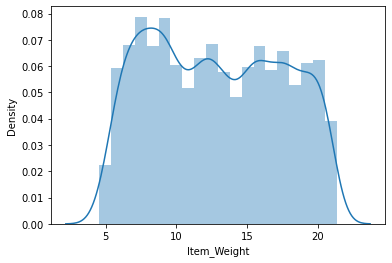

C:\Users\dured\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


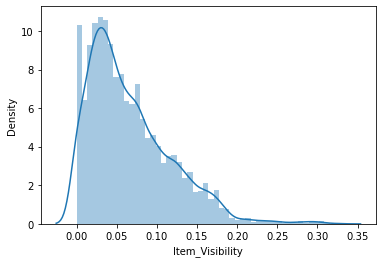

C:\Users\dured\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


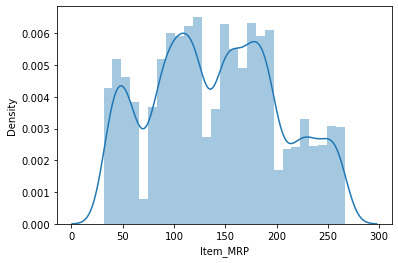

C:\Users\dured\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


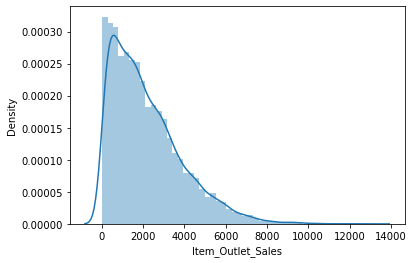

In [12]:
for each in numerical_columns:
    if each!= 'Outlet_Establishment_Year':
        sns.distplot(train_df[each].dropna())
        plt.show()

C:\Users\dured\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


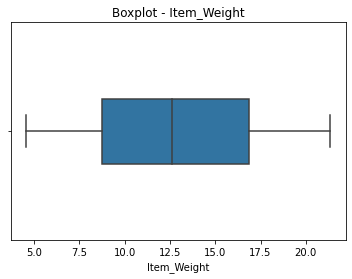

C:\Users\dured\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


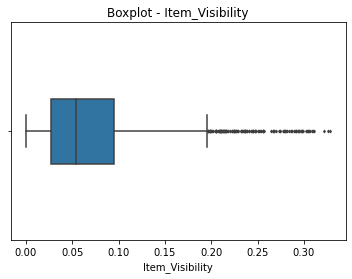

C:\Users\dured\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


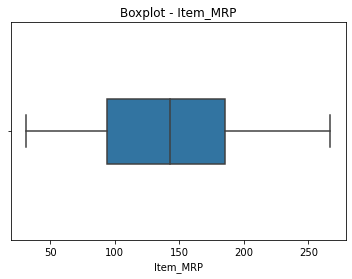

C:\Users\dured\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


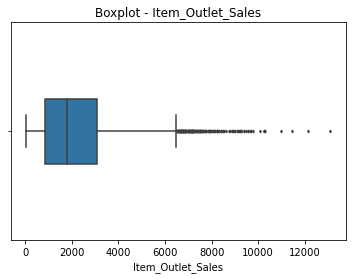

In [13]:
for each in numerical_columns:
    if each!='Outlet_Establishment_Year':
        outliers_plot=sns.boxplot(x=each,data=train_df,orient='v', width=0.3, fliersize=2)
        outliers_plot.set_title('Boxplot - '+each)
        plt.show()

Number of Outliers in Feature Item_Weight is 0

Number of Outliers in Feature Item_Visibility is 116





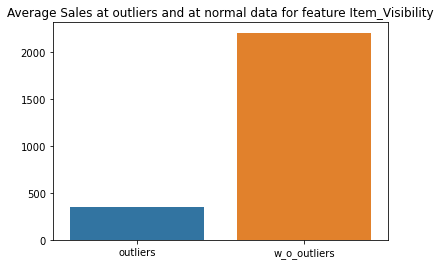





Number of Outliers in Feature Item_MRP is 0

Number of Outliers in Feature Item_Outlet_Sales is 154



In [14]:
# Count of Outliers:

just_numerical_cols=[each for each in numerical_columns if each!='Outlet_Establishment_Year']
w_nans_numerical_df=train_df[just_numerical_cols]
no_nan_df=pd.DataFrame()
for each in w_nans_numerical_df.columns:
    no_nan_df[each]=w_nans_numerical_df[~w_nans_numerical_df[each].isna()].reset_index()[each]
    
for each in just_numerical_cols:
    Q1 = no_nan_df[each].quantile(0.25)
    Q3 = no_nan_df[each].quantile(0.75)
    IQR = Q3 - Q1
    r1=Q1-1.5*IQR
    r2=Q3+1.5*IQR
    outliers=no_nan_df[(no_nan_df[each]<r1)|(no_nan_df[each]>r2)][each]
    print('Number of Outliers in Feature '+each+' is '+str(len(outliers))+'\n')
    outliers_indicator_df=train_df
    if len(outliers)>0 and each!='Item_Outlet_Sales':
        outliers_indicator_df=outliers_indicator_df[~(outliers_indicator_df[each].isna()) & ~(outliers_indicator_df['Item_Outlet_Sales'].isna())][[
            each,'Item_Outlet_Sales']]
        sales_at_outliers=outliers_indicator_df[outliers_indicator_df[each].isin(outliers)]['Item_Outlet_Sales'].mean()
        sales_w_o_outliers=outliers_indicator_df[~outliers_indicator_df[each].isin(outliers)]['Item_Outlet_Sales'].mean()
        sales_outlier_plot=sns.barplot(x=['outliers','w_o_outliers'],y=[sales_at_outliers,sales_w_o_outliers])
        sales_outlier_plot.set_title('Average Sales at outliers and at normal data for feature '+each)
        print('\n')
        plt.show()
        print('\n\n\n')

### 1.4). Numerical Features Variation with Target:

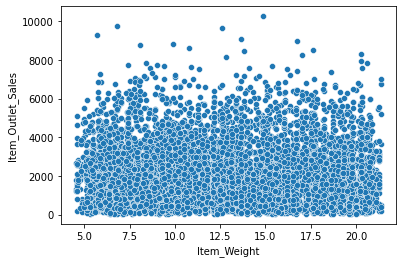

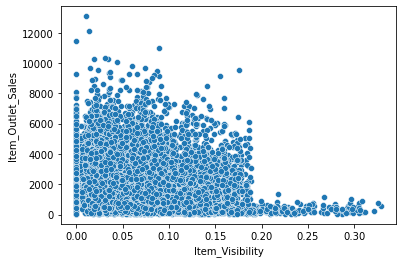

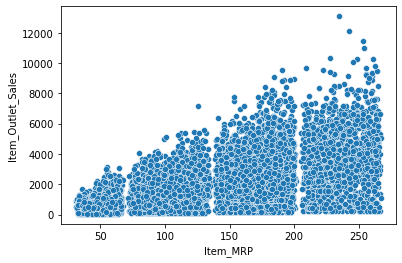

In [15]:
for each in numerical_columns:
    if each not in ['Item_Outlet_Sales','Outlet_Establishment_Year']:
        sns.scatterplot(x=each,y='Item_Outlet_Sales',data=train_df)
        plt.show()

In [16]:
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

### 1.5). Categorical Features Distribution:

Text(0.5, 1.0, 'Outlet_Year Vs Item_Sales')

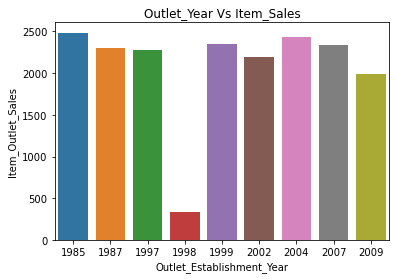

In [17]:
# Ordinal Feature Variation on Target:
outlet_year_sales=train_df[['Item_Outlet_Sales','Outlet_Establishment_Year']].groupby(['Outlet_Establishment_Year']).mean().reset_index()
outlet_year_sales_bar=sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales', data=outlet_year_sales)
outlet_year_sales_bar.set_title('Outlet_Year Vs Item_Sales')

In [18]:
for each in categorical_columns:
    print('Number of Categories in Feature '+each+' is '+str(len(train_df[each].unique())))

Number of Categories in Feature Item_Identifier is 1559
Number of Categories in Feature Item_Fat_Content is 5
Number of Categories in Feature Item_Type is 16
Number of Categories in Feature Outlet_Identifier is 10
Number of Categories in Feature Outlet_Size is 4
Number of Categories in Feature Outlet_Location_Type is 3
Number of Categories in Feature Outlet_Type is 4


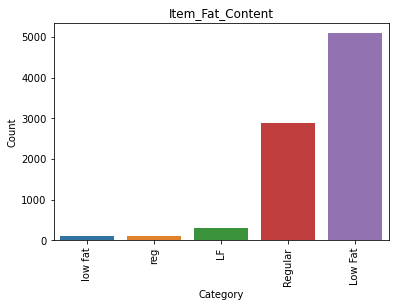

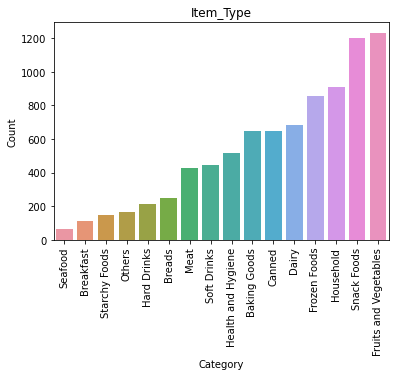

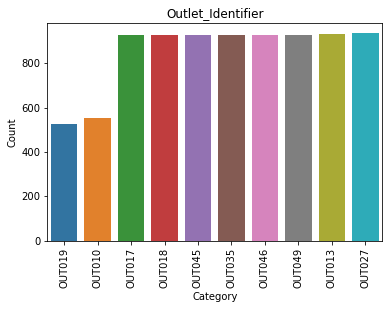

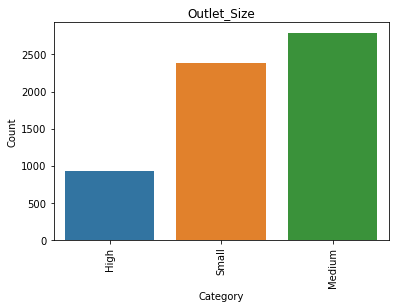

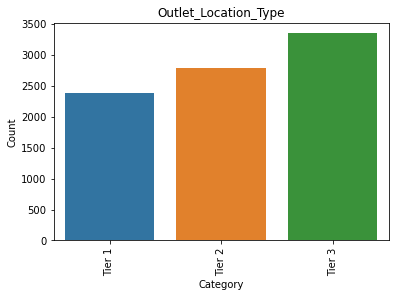

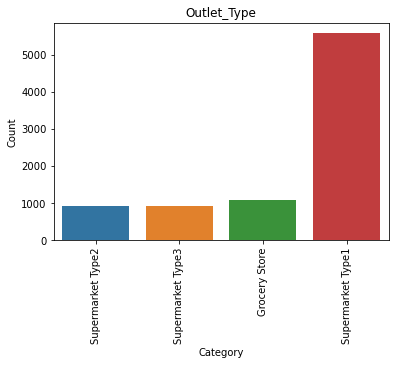

In [19]:
for each in categorical_columns:
    if each!='Item_Identifier':
        count_cat=pd.DataFrame(train_df[each].value_counts()).sort_values([each]).reset_index().rename(
            {'index':'Category', each:'Count'}, axis=1)
        count_cats_plot=sns.barplot(x='Category', y='Count', data=count_cat)
        count_cats_plot.set_xticklabels(count_cats_plot.get_xticklabels(), rotation=90)
        count_cats_plot.set_title(each)
        plt.show()

### 1.6). Target Variation between Categories: 

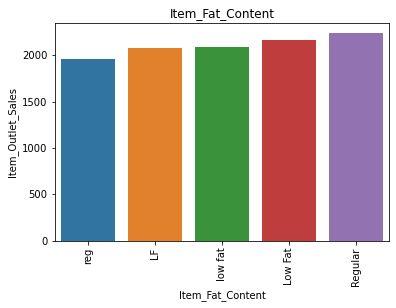

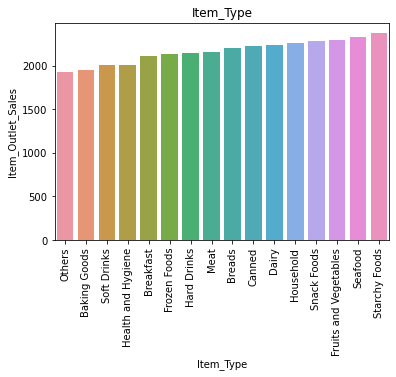

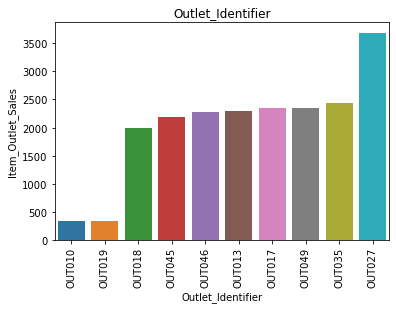

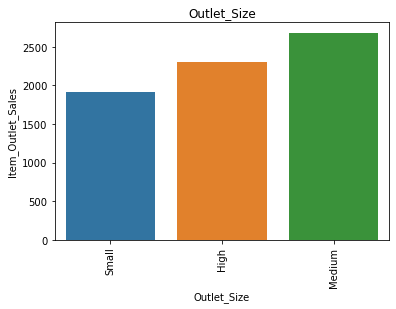

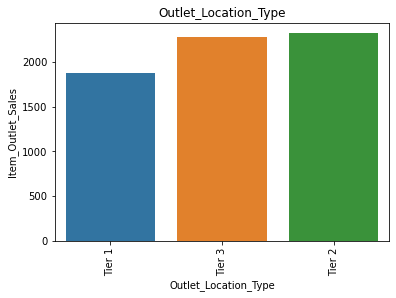

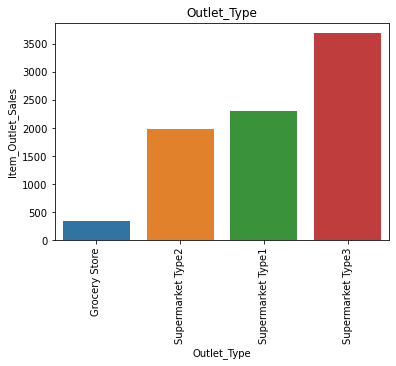

In [20]:
for each in categorical_columns:
    if each!='Item_Identifier':
        mean_cat=pd.DataFrame(train_df[[each,'Item_Outlet_Sales']].groupby([each]).mean()).sort_values(['Item_Outlet_Sales']).reset_index()
        mean_cats_plot=sns.barplot(x=each, y='Item_Outlet_Sales', data=mean_cat)
        mean_cats_plot.set_xticklabels(mean_cats_plot.get_xticklabels(), rotation=90)
        mean_cats_plot.set_title(each)
        plt.show()

## 2). Data Cleansing:

### 2 .1). Handling Missing Data:

### 2.1.1). Handling Missing Numerical Data:

In [21]:
from scipy.stats import pearsonr
corr, x=pearsonr(train_df['Item_Weight'].dropna(),train_df[~train_df['Item_Weight'].isna()]['Item_Outlet_Sales'])
corr

0.014122739280056468

In [22]:
 #Are the items with the same identifier having same weights or different weights in the store
all_df.drop_duplicates(inplace=True)
print('number of items in data(based on item identifier) is '+str(len(all_df[~all_df['Item_Weight'].isna()]['Item_Identifier'].unique())))
print('number of items that have different set of weights(based on item identifier)')
nuwi=pd.DataFrame(all_df[~all_df['Item_Weight'].isna()].groupby(['Item_Identifier'])['Item_Weight'].nunique()).rename({'Item_Weight':'num of unique weights for same item(based on item identifier)'}, axis=1)
print(len(nuwi[nuwi['num of unique weights for same item(based on item identifier)']!=1]))
print('number of items that are sold at multiple outlets')
noi=pd.DataFrame(all_df[~all_df['Item_Weight'].isna()].groupby(['Item_Identifier'])['Outlet_Identifier'].nunique()).rename({'Outlet_Identifier':'number of outlets the item is sold at(based on item identifier)'}, axis=1)
print(len(noi[noi['number of outlets the item is sold at(based on item identifier)']!=1]))

number of items in data(based on item identifier) is 1559
number of items that have different set of weights(based on item identifier)
0
number of items that are sold at multiple outlets
1559


In [23]:
all_df['Item_Weight_Missing']=all_df['Item_Weight'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [24]:
item_weights=pd.DataFrame(all_df[~all_df['Item_Weight'].isna()].groupby(['Item_Identifier'])['Item_Weight'].unique())

In [25]:
item_weights=pd.DataFrame(all_df[~all_df['Item_Weight'].isna()].groupby(['Item_Identifier'])['Item_Weight'].unique())
for each in item_weights.index:
    all_df.loc[(all_df['Item_Identifier']==(str(each))),'Item_Weight']=str(item_weights.loc[each,'Item_Weight']).lstrip('[').rstrip(']')

#### As some of the weights in train_df cannot be imputed with the items with the same item_id it the df, 
#### we are using complete df which contains all information on weights of all items with unique item ids, 
#### for imputation of missing weights 

### 2.1.2). Handling Missing Categorical Data:

In [26]:
all_df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [27]:
outlet_sizes_drop=all_df[~all_df['Outlet_Size'].isna()]
print('number of outlets as in provided data are '+str(len(outlet_sizes_drop['Outlet_Identifier'].unique())))

number of outlets as in provided data are 7


In [28]:
# number of outlets with different sizes (checking for expansion of outlets from data)
outlet_size_df=pd.DataFrame(outlet_sizes_drop.groupby(['Outlet_Identifier'])['Outlet_Size'].nunique()).rename({'Outlet_Size':'number of different sizes for outlet'}, axis=1)
print('outlets with different sizes is/are <if outlet size is mentioned for an outlet<considering records after dropping nulls in Outlet_Size feature>>')
outlet_size_df[outlet_size_df['number of different sizes for outlet']!=1]

outlets with different sizes is/are <if outlet size is mentioned for an outlet<considering records after dropping nulls in Outlet_Size feature>>


,number of different sizes for outlet
Outlet_Identifier,


In [29]:
outlet_sizes_drop['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT013', 'OUT027', 'OUT046', 'OUT035',
       'OUT019'], dtype=object)

In [30]:
all_df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [31]:
# The above analysis indicates that outlets - OUT010, OUT045, OUT017 dont have any sizes mentioned in the complete data

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

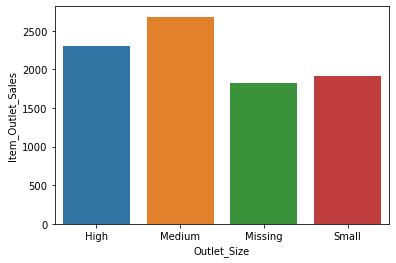

In [32]:
# From above, we came to know that there are 3 outlets that have only missing values at outlet sizes.

train_df_outletsize_target=all_df.loc[0:len(train_df)-1,:].copy()
train_df_outletsize_target.loc[train_df_outletsize_target['Outlet_Size'].isna(),'Outlet_Size']='Missing'
train_df_outletsize_target=pd.DataFrame(train_df_outletsize_target.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()).reset_index()
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train_df_outletsize_target)

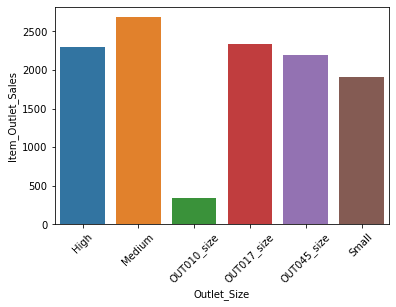

In [33]:
train_df_outletsize_target1=all_df.loc[0:len(train_df)-1,:].copy()
for each in ['OUT010', 'OUT045', 'OUT017']:
    train_df_outletsize_target1.loc[(train_df_outletsize_target1['Outlet_Identifier']==each),'Outlet_Size']=str(each)+'_size'

train_df_outletsize_target1=pd.DataFrame(train_df_outletsize_target1.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()).reset_index()
train_df_outletsize_target_plot1=sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train_df_outletsize_target1)
train_df_outletsize_target_plot1.set_xticklabels(train_df_outletsize_target_plot1.get_xticklabels(), rotation=45)
plt.show()

In [34]:
# It is better to take missing as category for missing values at outlet sizes. It is to reduce the collinearity 
# between features outlet_identifier and Outlet_Size.

all_df.loc[all_df['Outlet_Size'].isna(),'Outlet_Size']='Missing'

## 2.2). Handling Error Data:

### 2.2.1). Item Visibility:

In [35]:
zero_visibility_records=all_df[all_df['Item_Visibility']==0]
print('Number of Records with zero visibility '+str(len(zero_visibility_records)))

Number of Records with zero visibility 879


In [36]:
item_visibility_mean=dict(all_df.groupby(['Item_Identifier'])['Item_Visibility'].mean())
all_df.loc[all_df['Item_Visibility']==0,'Item_Visibility']=all_df[all_df['Item_Visibility']==0]['Item_Identifier'].apply(
    lambda x: item_visibility_mean[x])
all_df1=all_df.copy()

### 2.1.2). Item Fat Content:

In [37]:
all_df1['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [38]:
all_df1.loc[(all_df1['Item_Fat_Content']=='LF'),'Item_Fat_Content']='Low Fat'
all_df1.loc[(all_df1['Item_Fat_Content']=='reg'),'Item_Fat_Content']='Regular'
all_df1.loc[(all_df1['Item_Fat_Content']=='low fat'),'Item_Fat_Content']='Low Fat'

# 3). Feature Engineering:

## 3.1). Data Exploration and Feature Building:

### 3.1.1). Item_Category: 

In [39]:
all_df1['Item_Identifier'].apply(lambda x: x[0:2]).value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier, dtype: int64

In [40]:
vals=all_df1['Item_Identifier'].apply(lambda x: x[0:2])
print(all_df1[vals=='FD']['Item_Type'].unique())
print(all_df1[vals=='NC']['Item_Type'].unique())
print(all_df1[vals=='DR']['Item_Type'].unique())

['Dairy' 'Meat' 'Fruits and Vegetables' 'Baking Goods' 'Snack Foods'
 'Frozen Foods' 'Breakfast' 'Canned' 'Breads' 'Starchy Foods' 'Seafood']
['Household' 'Health and Hygiene' 'Others']
['Soft Drinks' 'Hard Drinks' 'Dairy']


In [41]:
all_df1.loc[(vals=='DR')&(all_df1['Item_Type']=='Dairy'),'Item_Type']='Dairy Drinks'

In [42]:
vals=all_df1['Item_Identifier'].apply(lambda x: x[0:2])
print(all_df1[vals=='FD']['Item_Type'].unique())
print(all_df1[vals=='NC']['Item_Type'].unique())
print(all_df1[vals=='DR']['Item_Type'].unique())

['Dairy' 'Meat' 'Fruits and Vegetables' 'Baking Goods' 'Snack Foods'
 'Frozen Foods' 'Breakfast' 'Canned' 'Breads' 'Starchy Foods' 'Seafood']
['Household' 'Health and Hygiene' 'Others']
['Soft Drinks' 'Hard Drinks' 'Dairy Drinks']


In [43]:
all_df1['Item_Department']=pd.Series(['a']*len(all_df1))
all_df1.loc[:,'Item_Department']=all_df1['Item_Identifier'].apply(lambda x: x[0:2])

### 3.1.2). Item_Category_Choices: 

In [44]:
numberofchoices_dept={'FD':11,'NC':3, 'DR':3}
all_df1['Number_Of_Similar_Items']=pd.Series(['a']*len(all_df1))
all_df1.loc[:,'Number_Of_Similar_Items']=all_df1['Item_Identifier'].apply(lambda x: numberofchoices_dept[x[0:2]])

In [45]:
dict_similar_items_store=dict(all_df1.groupby(['Outlet_Identifier','Item_Department'])['Item_Identifier'].nunique())
x=list(dict_similar_items_store.keys())
for each in x:
    dict_similar_items_store[each[0]+'-'+each[1]]=dict_similar_items_store.pop(each)
dict_similar_items_store

{'OUT010-DR': 88,
 'OUT010-FD': 660,
 'OUT010-NC': 177,
 'OUT013-DR': 145,
 'OUT013-FD': 1116,
 'OUT013-NC': 292,
 'OUT017-DR': 145,
 'OUT017-FD': 1107,
 'OUT017-NC': 291,
 'OUT018-DR': 144,
 'OUT018-FD': 1112,
 'OUT018-NC': 290,
 'OUT019-DR': 75,
 'OUT019-FD': 637,
 'OUT019-NC': 168,
 'OUT027-DR': 145,
 'OUT027-FD': 1119,
 'OUT027-NC': 295,
 'OUT035-DR': 145,
 'OUT035-FD': 1113,
 'OUT035-NC': 292,
 'OUT045-DR': 143,
 'OUT045-FD': 1111,
 'OUT045-NC': 294,
 'OUT046-DR': 144,
 'OUT046-FD': 1112,
 'OUT046-NC': 294,
 'OUT049-DR': 143,
 'OUT049-FD': 1114,
 'OUT049-NC': 293}

In [46]:
all_df1['Similar_items_in_store']=all_df1.apply(lambda row: dict_similar_items_store[str(row[6])+'-'+str(row[13])], axis=1)

### 3.1.3). Years_of_Run: 

In [47]:
# As of year 2013 the data was given:
all_df1['Years_of_Run']=all_df1['Outlet_Establishment_Year'].apply(lambda x: 2013-x)

In [48]:
# we also see that products that are NC meaning non consumable that include items like 'Household' 'Health and Hygiene' 'Others'
# have fat content. If these items are non consumables according to the item types provided, we can place them in another category
# like not applicable

### 3.1.4). Item_Fat_Content:  

In [49]:
# NC indicates non consumables. Fat_Content doesn't apply to NC identified objects:
all_df1.loc[all_df1['Item_Department']=='NC','Item_Fat_Content']='Not Applicable'

In [50]:
train_df1=all_df1.loc[0:len(train_df)-1,:]
test_df1=all_df1.loc[len(train_df):len(all_df1)-1,:]

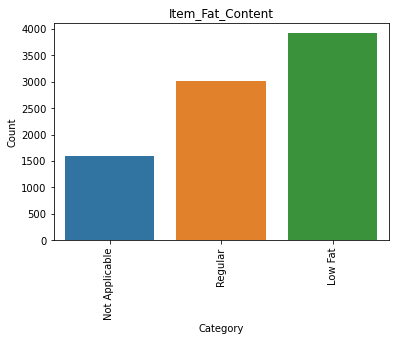

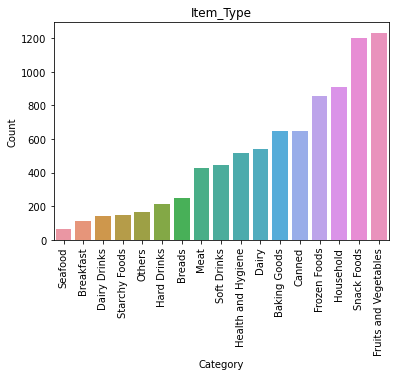

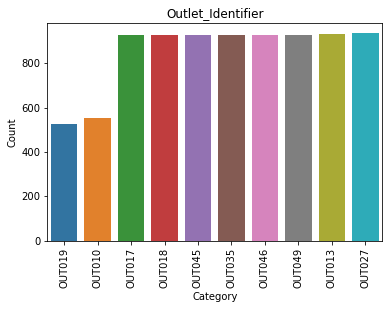

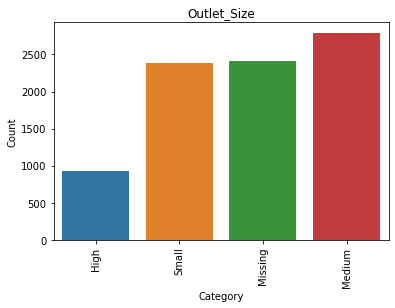

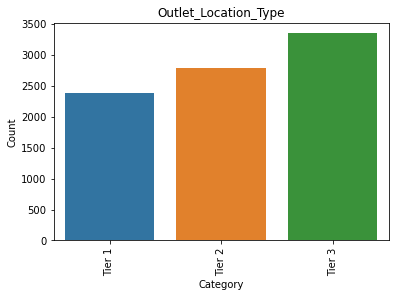

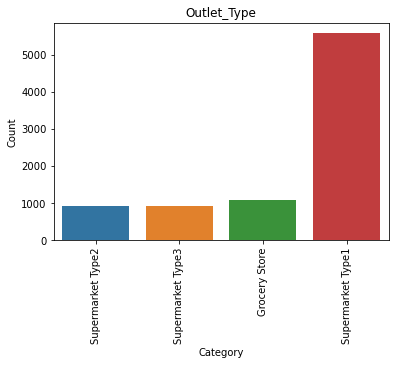

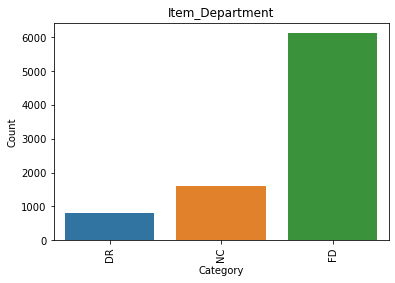

In [51]:
categorical_columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Department']
for each in categorical_columns:
    count_cat=pd.DataFrame(train_df1[each].value_counts()).sort_values([each]).reset_index().rename(
        {'index':'Category', each:'Count'}, axis=1)
    count_cats_plot=sns.barplot(x='Category', y='Count', data=count_cat)
    count_cats_plot.set_xticklabels(count_cats_plot.get_xticklabels(), rotation=90)
    count_cats_plot.set_title(each)
    plt.show()

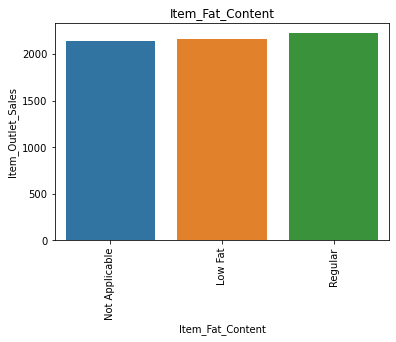

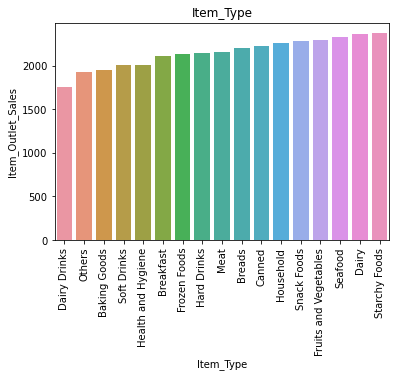

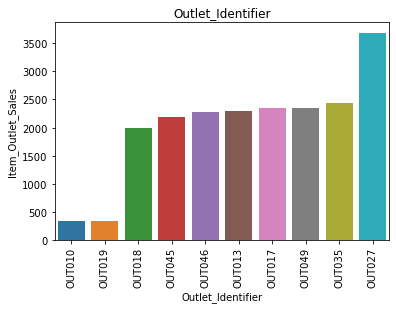

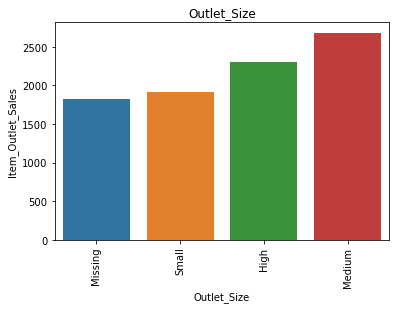

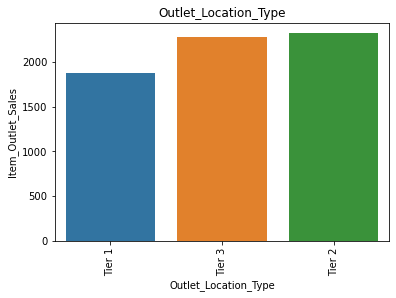

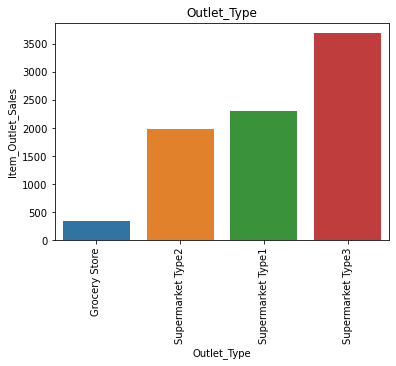

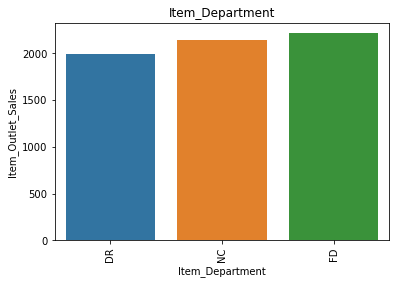

In [52]:
for each in categorical_columns:
    mean_cat=pd.DataFrame(train_df1[[each,'Item_Outlet_Sales']].groupby([each]).mean()).sort_values(['Item_Outlet_Sales']).reset_index()
    mean_cats_plot=sns.barplot(x=each, y='Item_Outlet_Sales', data=mean_cat)
    mean_cats_plot.set_xticklabels(mean_cats_plot.get_xticklabels(), rotation=90)
    mean_cats_plot.set_title(each)
    plt.show()

### 3.1.5). Outlet Identifier:

In [53]:
all_df1['Outlet_Identifier_Similar']=all_df1['Outlet_Identifier'].apply(lambda x: 'OUT010 or OUT019' if (x=='OUT010' or x=='OUT019') else x)

### 3.1.6). Item_Visibility:

In [54]:
Q1 = train_df1['Item_Visibility'].quantile(0.25)
Q3 = train_df1['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
r1=Q1-1.5*IQR
r2=Q3+1.5*IQR
all_df1['Item_Visibility_Outlier']=all_df1['Item_Visibility'].apply(lambda x: 1 if ((x<r1) or (x>r2)) else 0)

## 3.2). Feature Encoding:

In [55]:
all_df_auto_encoding=all_df1.copy()

In [56]:
categorical_columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier_Similar', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Department']
numerical_columns=['Item_Weight', 'Item_Visibility','Item_MRP']
ordinal_columns=['Years_of_Run','Number_Of_Similar_Items','Similar_items_in_store','Item_Weight_Missing','Item_Visibility_Outlier']
target_column=['Item_Outlet_Sales']

train_df1=all_df1.loc[0:len(train_df)-1,:]
test_df1=all_df1.loc[len(train_df):len(all_df1),:]

### 3.2.1). Target Encoding:

### Item_Fat_Content, Item_Type, Outlet_Identifier_Similar:

In [57]:
dict_item_fat=dict(all_df1.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].mean())
dict_item_fat

{'Low Fat': 2163.8292680959617,
 'Not Applicable': 2142.721363727331,
 'Regular': 2224.561170126416}

In [58]:
# As there is a meaningful ordering in the fat content encoded value, we can use the target encoding
all_df1['Item_Fat_Content_Lb']=all_df1['Item_Fat_Content'].apply(lambda x: dict_item_fat[x])

In [59]:
Item_Type_dict=dict(train_df1.groupby(['Item_Type'])['Item_Outlet_Sales'].mean())
Item_Type_dict

{'Baking Goods': 1952.9712070987655,
 'Breads': 2204.132226294819,
 'Breakfast': 2111.8086509090913,
 'Canned': 2225.194903852079,
 'Dairy': 2356.855838376385,
 'Dairy Drinks': 1751.272762857142,
 'Frozen Foods': 2132.8677436915864,
 'Fruits and Vegetables': 2289.009591558443,
 'Hard Drinks': 2139.2216224299054,
 'Health and Hygiene': 2010.0002650000006,
 'Household': 2258.7843002197783,
 'Meat': 2158.9779105882344,
 'Others': 1926.139701775148,
 'Seafood': 2326.065928125,
 'Snack Foods': 2277.3217391666685,
 'Soft Drinks': 2006.5117348314586,
 'Starchy Foods': 2374.3327729729745}

In [60]:
# As the number of categories in Item_Type and Outlet_Identifier_Similar are more, it is feasible to do target encoding:
all_df1['Item_Type_Lb']=all_df1['Item_Type'].apply(lambda x: Item_Type_dict[x])

In [61]:
Outlet_Identifier_dict=dict(train_df1.groupby(['Outlet_Identifier_Similar'])['Item_Outlet_Sales'].mean())
Outlet_Identifier_dict

{'OUT010 or OUT019': 339.8285004616805,
 'OUT013': 2298.9952555793975,
 'OUT017': 2340.67526349892,
 'OUT018': 1995.4987392241392,
 'OUT027': 3694.038557647059,
 'OUT035': 2438.8418660215075,
 'OUT045': 2192.3847976318607,
 'OUT046': 2277.8442668817192,
 'OUT049': 2348.354634623656}

In [62]:
all_df1['Outlet_Identifier_Similar_Lb']=all_df1['Outlet_Identifier_Similar'].apply(lambda x: Outlet_Identifier_dict[x])

### 3.2.2). One-Hot Encoding: 

### Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Department

In [63]:
Categorical_Cols_Onehot=["Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Department"]
all_df2=pd.get_dummies(all_df1, columns=Categorical_Cols_Onehot)

### 3.2.3). Drop original features that are already encoded:

In [64]:
drop_cols=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Identifier_Similar']
all_df2.drop(columns=drop_cols, axis=1, inplace=True)

In [65]:
all_df2.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Weight_Missing', 'Number_Of_Similar_Items',
       'Similar_items_in_store', 'Years_of_Run', 'Item_Visibility_Outlier',
       'Item_Fat_Content_Lb', 'Item_Type_Lb', 'Outlet_Identifier_Similar_Lb',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Missing',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Department_DR', 'Item_Department_FD', 'Item_Department_NC'],
      dtype='object')

## 3.3). Feature Scaling:

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaling_features=['Item_Weight', 'Item_Visibility', 'Item_MRP','Number_Of_Similar_Items','Similar_items_in_store', 
                'Years_of_Run','Item_Fat_Content_Lb', 'Item_Type_Lb', 'Outlet_Identifier_Similar_Lb']

scaler=MinMaxScaler()
all_df2[scaling_features]=scaler.fit_transform(X=all_df2[scaling_features])
all_df2.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Weight_Missing,Number_Of_Similar_Items,Similar_items_in_store,Years_of_Run,Item_Visibility_Outlier,Item_Fat_Content_Lb,Item_Type_Lb,Outlet_Identifier_Similar_Lb,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Department_DR,Item_Department_FD,Item_Department_NC
0,0.282525,0.038399,0.927507,3735.1380,0,1.0,0.995211,0.416667,0,0.257917,0.971950,0.598807,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1,0.081274,0.048346,0.072068,443.4228,0,0.0,0.066092,0.000000,0,1.000000,0.409654,0.493610,0,1,0,0,0,0,1,0,0,1,0,1,0,0
2,0.770765,0.040593,0.468288,2097.2700,0,1.0,0.995211,0.416667,0,0.257917,0.654359,0.598807,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0.871986,0.043901,0.640093,732.3800,0,1.0,0.560345,0.458333,0,1.000000,0.863058,0.000000,0,0,1,0,0,0,1,1,0,0,0,0,1,0
4,0.260494,0.019104,0.095805,994.7052,0,0.0,0.207854,0.916667,0,0.000000,0.814547,0.584092,1,0,0,0,0,0,1,0,1,0,0,0,0,1


In [67]:
train_df2=all_df2.loc[0:len(train_df)-1,:].copy()
test_df2=all_df2.loc[(len(train_df)):(len(all_df2)-1),:].copy()

In [68]:
train_df2.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Weight_Missing', 'Number_Of_Similar_Items',
       'Similar_items_in_store', 'Years_of_Run', 'Item_Visibility_Outlier',
       'Item_Fat_Content_Lb', 'Item_Type_Lb', 'Outlet_Identifier_Similar_Lb',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Missing',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Department_DR', 'Item_Department_FD', 'Item_Department_NC'],
      dtype='object')

# 4). Build and Configure ML Model:

## 4.1). Random Check Models Performance on Data:

In [69]:
#!conda install --yes pycaret
from pycaret.regression import *

caret_all_df2 = setup(data = train_df2, session_id = 55, target = 'Item_Outlet_Sales', test_data=test_df2)

,Description,Value
0,session_id,55
1,Target,Item_Outlet_Sales
2,Original Data,"(8523, 26)"
3,Missing Values,False
4,Numeric Features,22
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8523, 24)"


In [70]:
compare_models(fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,760.1644,1185292.2814,1088.5860,0.5915,0.5510,0.5614,0.7130
lightgbm,Light Gradient Boosting Machine,769.0969,1236735.8710,1111.7982,0.5737,0.5491,0.5644,0.0550
catboost,CatBoost Regressor,781.6266,1264194.3282,1124.0882,0.5642,0.5818,0.5739,5.7590
omp,Orthogonal Matching Pursuit,836.3830,1273336.8380,1128.2993,0.5615,0.7313,1.0391,0.0090
rf,Random Forest Regressor,786.6913,1270866.2078,1127.0056,0.5615,0.5507,0.5680,1.4470
lasso,Lasso Regression,836.9934,1275333.2750,1129.1833,0.5608,0.7283,1.0322,0.0120
lr,Linear Regression,837.9669,1277044.9000,1129.9420,0.5602,0.7325,1.0373,0.7580
ridge,Ridge Regression,837.9573,1277076.5125,1129.9557,0.5602,0.7300,1.0359,0.0140
br,Bayesian Ridge,837.9392,1277078.2755,1129.9564,0.5602,0.7298,1.0355,0.0140
llar,Lasso Least Angle Regression,837.8262,1288648.4441,1135.0137,0.5565,0.7128,0.9548,0.0080


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=55, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## 4.2). Tune Hyper Parameters of Model:

In [71]:
from sklearn.model_selection import KFold

def Regressor_Performance_CV(df, model, error_metric, target_column, params_kfolds=[5, False, None], stats=False):
    kf = KFold(n_splits = params_kfolds[0], shuffle=params_kfolds[1], random_state=params_kfolds[2])
    generator_kfolds = kf.split(df)
    train_errors=[]
    validation_errors=[]
    for each in range(0, params_kfolds[0]):
        result=next(generator_kfolds,None)
        train_set_input = df.iloc[result[0]]
        validation_set_input =  df.iloc[result[1]]
        label_train_actual=train_set_input.pop(target_column)
        label_validation_actual=validation_set_input.pop(target_column)
        model.fit(train_set_input,label_train_actual)
        label_train_predict=model.predict(train_set_input)
        label_validation_predict=model.predict(validation_set_input)
        train_error=error_metric(label_train_actual,label_train_predict)
        validation_error=error_metric(label_validation_actual,label_validation_predict)
        train_errors.append(train_error)
        validation_errors.append(validation_error)
    if stats:
        print('Training errors using Kfold validation are as follow:')
        print(train_errors)
        print('Validation errors using Kfold validation are as follow:')
        print(validation_errors)
        print('Mean Error on training data using kfolds is')
        print(np.mean(train_errors))
        print('Mean Error on validation data using kfolds is')
        print(np.mean(validation_errors))
    
    return np.mean(train_errors),np.mean(validation_errors)

Optimation for Parameter learning_rate
learning_rate  =  0.15
cv mean train_error is  1006.3264930092486   10  folds
cv mean validation_error is  1095.700048176134   10  folds
learning_rate  =  0.1
cv mean train_error is  1026.7890210903943   10  folds
cv mean validation_error is  1088.7925036967592   10  folds
learning_rate  =  0.05
cv mean train_error is  1050.0626040151578   10  folds
cv mean validation_error is  1082.4790580783713   10  folds
learning_rate  =  0.01
cv mean train_error is  1220.3777720191192   10  folds
cv mean validation_error is  1226.3025403177471   10  folds


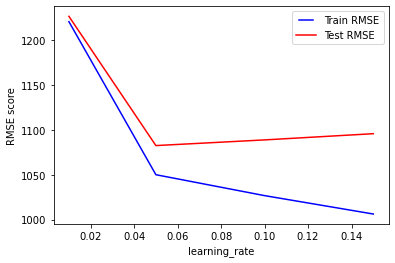

Optimation for Parameter n_estimators
n_estimators  =  32
cv mean train_error is  1063.1836641201355   10  folds
cv mean validation_error is  1082.8430502312133   10  folds
n_estimators  =  43
cv mean train_error is  1053.5560830984768   10  folds
cv mean validation_error is  1081.2713999762036   10  folds
n_estimators  =  50
cv mean train_error is  1049.634523048763   10  folds
cv mean validation_error is  1082.5578169492835   10  folds
n_estimators  =  100
cv mean train_error is  1026.7890210903943   10  folds
cv mean validation_error is  1088.7925036967592   10  folds


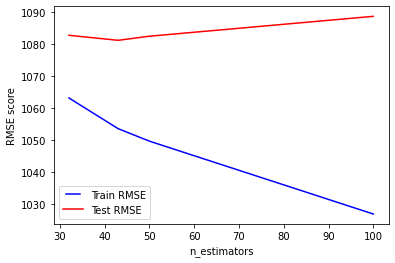

Optimation for Parameter max_depth
max_depth  =  1.0
cv mean train_error is  1125.9545568603453   10  folds
cv mean validation_error is  1134.8893026690323   10  folds
max_depth  =  2.0
cv mean train_error is  1053.74713558546   10  folds
cv mean validation_error is  1083.3008353272942   10  folds
max_depth  =  3.0
cv mean train_error is  1026.7890210903943   10  folds
cv mean validation_error is  1088.7925036967592   10  folds
max_depth  =  4.0
cv mean train_error is  985.4622171393811   10  folds
cv mean validation_error is  1097.594498723525   10  folds
max_depth  =  5.0
cv mean train_error is  928.4817768212628   10  folds
cv mean validation_error is  1102.4796904618129   10  folds
max_depth  =  6.0
cv mean train_error is  857.8838283681107   10  folds
cv mean validation_error is  1116.8264788885638   10  folds
max_depth  =  7.0
cv mean train_error is  767.4833870132286   10  folds
cv mean validation_error is  1128.08241913034   10  folds
max_depth  =  8.0
cv mean train_error is  6

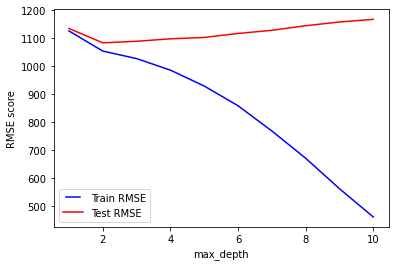

Optimation for Parameter min_samples_split
min_samples_split  =  0.01
cv mean train_error is  1033.4205380885487   10  folds
cv mean validation_error is  1087.9609080139523   10  folds
min_samples_split  =  0.02
cv mean train_error is  1036.287253185941   10  folds
cv mean validation_error is  1085.261288314523   10  folds
min_samples_split  =  0.03
cv mean train_error is  1037.8401777819536   10  folds
cv mean validation_error is  1084.665753544373   10  folds
min_samples_split  =  0.04
cv mean train_error is  1038.2547586694327   10  folds
cv mean validation_error is  1084.926693094753   10  folds
min_samples_split  =  0.05
cv mean train_error is  1039.1723196954574   10  folds
cv mean validation_error is  1084.7413748247725   10  folds


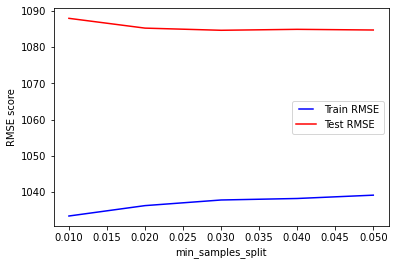

Optimation for Parameter min_samples_leaf
min_samples_leaf  =  0.006
cv mean train_error is  1040.0240049974034   10  folds
cv mean validation_error is  1080.213806067494   10  folds
min_samples_leaf  =  0.007
cv mean train_error is  1040.4268132923194   10  folds
cv mean validation_error is  1079.9149168419624   10  folds
min_samples_leaf  =  0.008
cv mean train_error is  1040.0472201675148   10  folds
cv mean validation_error is  1080.854809553348   10  folds
min_samples_leaf  =  0.009000000000000001
cv mean train_error is  1040.8756327289461   10  folds
cv mean validation_error is  1081.9704602239083   10  folds
min_samples_leaf  =  0.01
cv mean train_error is  1041.9957257996507   10  folds
cv mean validation_error is  1081.100401091777   10  folds


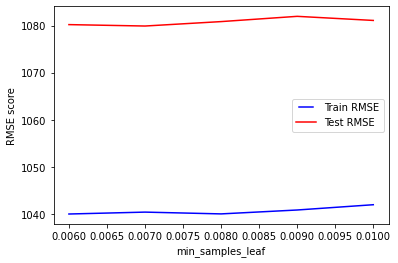

Optimation for Parameter max_features
max_features  =  6
cv mean train_error is  1043.386703469194   10  folds
cv mean validation_error is  1084.1835119152634   10  folds
max_features  =  10
cv mean train_error is  1037.0410448461307   10  folds
cv mean validation_error is  1084.7961111352029   10  folds
max_features  =  16
cv mean train_error is  1029.3095419407348   10  folds
cv mean validation_error is  1086.3756337300806   10  folds
max_features  =  24
cv mean train_error is  1026.734444125279   10  folds
cv mean validation_error is  1089.9990370738178   10  folds


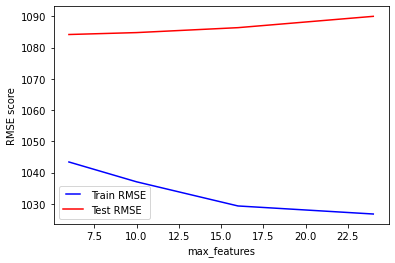

In [74]:
# learning_rate
# min_samples_leaf
# max_depth
# min_samples_split
# n_estimators

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
from matplotlib.legend_handler import HandlerLine2D

#features_train_df3=train_df2.copy()
#label_train_df3=features_train_df3.pop('Item_Outlet_Sales')

#x_train, x_val, y_train, y_val = train_test_split(features_train_df3, label_train_df3, test_size=0.10)

param_values_dict = {'learning_rate' : [0.15, 0.1, 0.05, 0.01],
'n_estimators' : [32, 43, 50, 100],
'max_depth' : np.linspace(1, 10, 10, endpoint=True),
'min_samples_split' : np.linspace(0.01, 0.05, 5, endpoint=True),
'min_samples_leaf' : np.linspace(0.006, 0.01, 5, endpoint=True),
'max_features' : [6,10,16,24]}

for param in param_values_dict:
    train_results=[]
    validation_results=[]
    print('Optimation for Parameter ' + param)
    for each in param_values_dict[param]:
        if param=='learning_rate':
            gbr = GradientBoostingRegressor(learning_rate=each,alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=55, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
        elif param=='n_estimators':
            gbr = GradientBoostingRegressor(n_estimators=each,alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=55, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
        elif param=='max_depth':
            gbr = GradientBoostingRegressor(max_depth=each,alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls',
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=55, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
        elif param=='min_samples_split':
            gbr = GradientBoostingRegressor(min_samples_split=each,alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=55, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
        elif param=='min_samples_leaf':
            gbr = GradientBoostingRegressor(min_samples_leaf=each,alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=55, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
        elif param=='max_features':
            gbr = GradientBoostingRegressor(max_features=each,alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=55, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
        else:
            break
        
        folds=10
        mean_train_error, mean_validation_error=Regressor_Performance_CV(df=train_df2.copy(), model=gbr, error_metric=mse, target_column='Item_Outlet_Sales', 
                                                params_kfolds=[folds,False, None])
        
        print(param, ' = ', str(each))
        print('cv mean train_error is ', np.sqrt(mean_train_error),' ',str(folds),' folds')
        print('cv mean validation_error is ', np.sqrt(mean_validation_error),' ',str(folds),' folds')
        train_results.append(np.sqrt(mean_train_error))
        validation_results.append(np.sqrt(mean_validation_error))

    line1, = plt.plot(param_values_dict[param], train_results, 'b', label='Train RMSE')
    line2, = plt.plot(param_values_dict[param], validation_results, 'r', label='Test RMSE')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('RMSE score')
    plt.xlabel(param)
    plt.show()

## 4.3). Fit and Predict:

In [77]:
gbr = GradientBoostingRegressor(learning_rate=0.15,alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=0.008, min_samples_split=0.03,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=55, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

folds=10
mean_train_error, mean_validation_error=Regressor_Performance_CV(df=train_df2.copy(), model=gbr, error_metric=mse, target_column='Item_Outlet_Sales', 
                                                params_kfolds=[folds,False, None])

print(str(np.sqrt(mean_train_error)),str(np.sqrt(mean_validation_error)))

1047.82540073879 1080.737862320867


In [78]:
features_train_df3=train_df2.copy()
label_train_df3=features_train_df3.pop('Item_Outlet_Sales')
gbr.fit(features_train_df3,label_train_df3)
test_features=test_df2.copy()
test_features.pop('Item_Outlet_Sales')
pred_test=gbr.predict(test_features)
pred_test

array([1718.15385343, 1343.19850245,  593.79437222, ..., 1797.69844211,
       3739.88111616, 1294.73487384])

In [79]:
output_df=pd.DataFrame(pred_test, columns=['Item_Outlet_Sales'])
output_df['Item_Identifier']=test_df['Item_Identifier']
output_df['Outlet_Identifier']=test_df['Outlet_Identifier']
output_df.loc[output_df['Item_Outlet_Sales']<0,'Item_Outlet_Sales']=0
output_df.to_csv('Big_Mart_Sales_Revised.csv', index=False)